## ASSIGNMENT 2
# PHÂN TÍCH DỮ LIỆU TMDB MOVIE
## Dựa vào dataset để phân tích và trả lời 3 câu hỏi sau:
   ### 1. Khu vực nào có ảnh hưởng nhất tới doanh thu?
   ### 2. Thể loại phim ảnh hưởng đến doanh thu và điểm trung bình như thế nào?
   ### 3. Ngày phát hành ảnh hưởng như thế nào đến doanh thu?

In [351]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import warnings
import sklearn
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import PowerTransformer
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [352]:
df_movies = pd.read_csv("C:/Users/Admin/Desktop/1CBDRobotic/res/week2/tmdb_5000_movies.csv/5000_movies.csv")
df_movies['release_date'] = pd.to_datetime(df_movies['release_date']).apply(lambda x: x.date())


### Dataset insight

In [353]:
print(df_movies.columns)
print(df_movies.shape)
df_movies.head(5)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [354]:
print(df_movies.info())
df_movies = df_movies[["genres","production_countries","release_date","revenue","vote_average"]]
print(df_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [355]:
print(df_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                4803 non-null   object 
 1   production_countries  4803 non-null   object 
 2   release_date          4802 non-null   object 
 3   revenue               4803 non-null   int64  
 4   vote_average          4803 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 187.7+ KB
None


### insight Null values

In [356]:
print(df_movies.loc[df_movies['release_date'].isnull()])

     genres production_countries release_date  revenue  vote_average
4553     []                   []          NaT        0           0.0


In [357]:
def parse_countries(production_countries):
    load_countries = json.loads(production_countries)
    countries = []
    for country in load_countries:
        countries.append(country["iso_3166_1"])
    return countries

In [358]:
df_movies_revenue_by_countries = df_movies[["production_countries","revenue"]]
df_movies_revenue_by_countries.replace(['[]','',0], np.nan, inplace=True)
df_movies_revenue_by_countries.dropna(inplace=True)
df_movies_revenue_by_countries["countries"] = df_movies["production_countries"].apply(lambda x:parse_countries(x))
df_movies_revenue_by_countries.head(10)

,production_countries,revenue,countries
0,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2.787965e+09,"[US, GB]"
1,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",9.610000e+08,[US]
2,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",8.806746e+08,"[GB, US]"
3,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1.084939e+09,[US]
4,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2.841391e+08,[US]
5,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",8.908716e+08,[US]
6,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5.917949e+08,[US]
7,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1.405404e+09,[US]
8,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",9.339592e+08,"[GB, US]"
9,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",8.732602e+08,[US]


In [359]:
countries_list = (",".join([",".join(x) for x in df_movies_revenue_by_countries["countries"]])).split(",")
countries_list = list(dict.fromkeys(countries_list))
print(len(countries_list))
print(countries_list)

63
['US', 'GB', 'JM', 'BS', 'DM', 'CZ', 'PL', 'SI', 'NZ', 'DE', 'CN', 'CA', 'IT', 'JP', 'MT', 'AU', 'FR', 'NL', 'ES', 'AE', 'IN', 'HK', 'TW', 'BE', 'IE', 'MA', 'HU', 'SG', 'NO', 'SE', 'ZA', 'RU', 'RO', 'MX', 'MC', 'CH', 'PK', 'FI', 'IS', 'DK', 'TN', 'PH', 'BG', 'KR', 'BR', 'PE', 'LU', 'PT', 'RS', 'CL', 'AR', 'KZ', 'GR', 'LT', 'AT', 'TH', 'FJ', 'CS', 'BO', 'IL', 'ID', 'AO', 'IR']


In [360]:
dict_revenue_by_country = {}
for index, row in df_movies_revenue_by_countries.iterrows():
    for country in row["countries"]:
        if country in dict_revenue_by_country:
            dict_revenue_by_country[country].append(row["revenue"])
        else:
            dict_revenue_by_country[country] = [row["revenue"]]

for key in list(dict_revenue_by_country):
    if len(dict_revenue_by_country[key]) < 20:
        dict_revenue_by_country.pop(key)

In [361]:
print(len(dict_revenue_by_country))
print(dict_revenue_by_country)

14
{'US': [2787965087.0, 961000000.0, 880674609.0, 1084939099.0, 284139100.0, 890871626.0, 591794936.0, 1405403694.0, 933959197.0, 873260194.0, 391081192.0, 586090727.0, 1065659812.0, 89289910.0, 662845518.0, 419651413.0, 1519557910.0, 1045713802.0, 624026776.0, 956019788.0, 752215857.0, 310669540.0, 958400000.0, 372234864.0, 550000000.0, 1845034188.0, 1153304495.0, 303025485.0, 1513528810.0, 1108561013.0, 783766341.0, 1215439994.0, 1025491110.0, 459359555.0, 743559607.0, 836297228.0, 1091405097.0, 491868548.0, 705717432.0, 400062763.0, 559852396.0, 219851172.0, 1066969703.0, 371353001.0, 1506249360.0, 531865000.0, 747862775.0, 467365246.0, 197687603.0, 351040419.0, 335154643.0, 407602906.0, 1123746996.0, 786636033.0, 331926147.0, 538983207.0, 343471816.0, 521311860.0, 258022233.0, 769653595.0, 325233863.0, 183987723.0, 356743061.0, 748806957.0, 543934787.0, 1004558444.0, 735099082.0, 381509870.0, 585174222.0, 185770160.0, 222104681.0, 401128639.0, 745000000.0, 173000000.0, 370541256.0

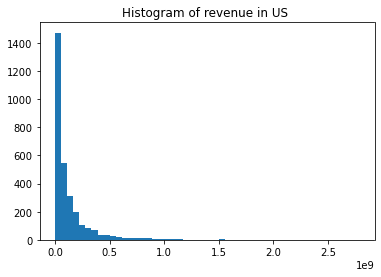

In [362]:
plt.hist(dict_revenue_by_country.get('US'), 50)
plt.title("Histogram of revenue in US ")
plt.show()


### Ta thấy data chưa được đưa về dạng normal distribution.

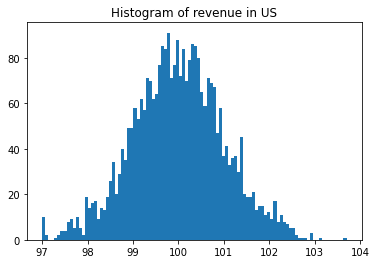

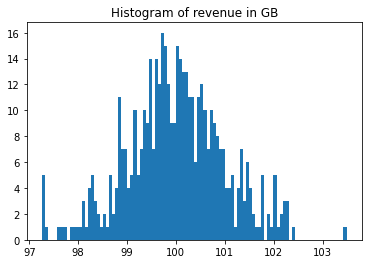

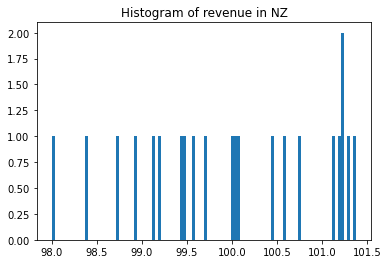

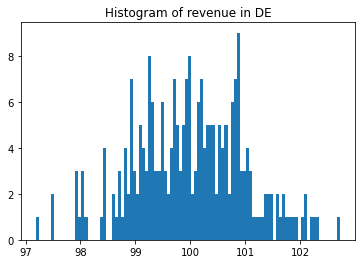

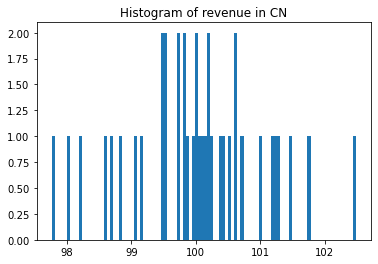

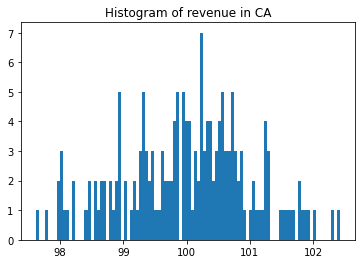

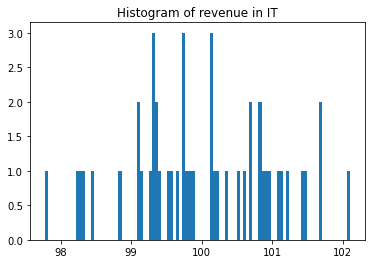

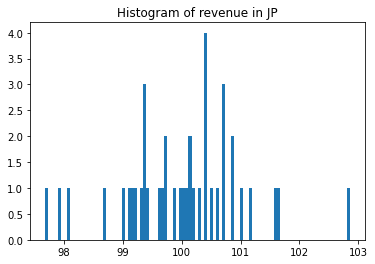

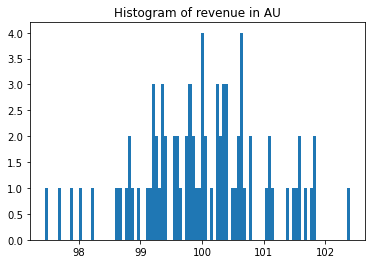

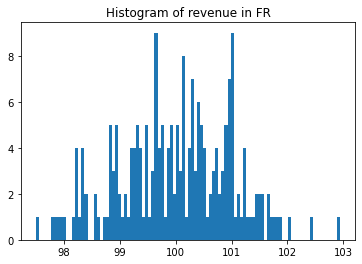

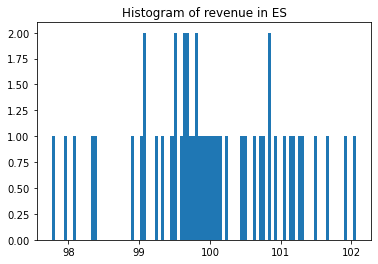

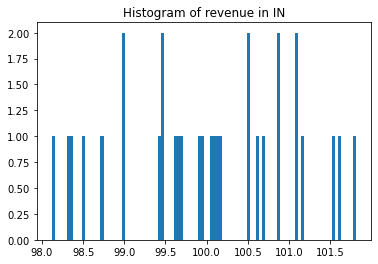

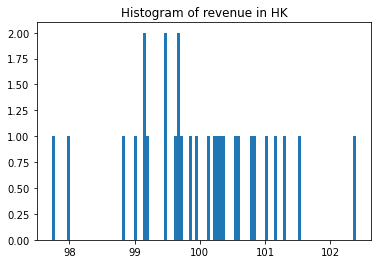

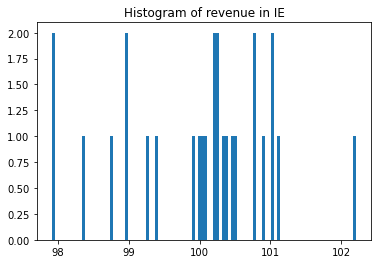

In [363]:
for key in dict_revenue_by_country.keys():
    temp = np.array(dict_revenue_by_country.get(key)).reshape(-1,1)
    transform_model = PowerTransformer().fit(temp)
    
    plt.hist(transform_distribution(temp),100)
    plt.title("Histogram of revenue in " + key)
    plt.show()


In [364]:
temp = [(dict_revenue_by_country.get(key)) for key in dict_revenue_by_country.keys()]
anova_test = f_oneway(*temp)
print(anova_test)

F_onewayResult(statistic=6.728392555139529, pvalue=5.888473746181328e-13)


### => Ta thấy pvalue < 0.05, do đó có thể phủ định H0 và chấp nhận giả thuyết H1: khu vực có ảnh hưởng đến doanh thu

### Ta thấy khu vực ảnh hưởng nhất tới doanh thu sẽ là khu vực có số lượng bộ phim nhiều nhất

[3011, 459, 22, 239, 39, 170, 48, 41, 82, 207, 49, 31, 29, 27]


<BarContainer object of 14 artists>

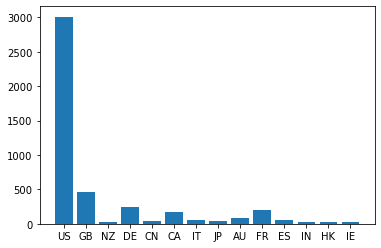

In [365]:
temp = []
for key in dict_revenue_by_country.keys():
    temp.append(len(dict_revenue_by_country.get(key)))
print(temp)

plt.bar(list(dict_revenue_by_country),temp)

### => Ta thấy US có số lượng bộ phim vượt trội so với các quốc gia khác, có thể nhận xét: US là nước có ảnh hưởng nhất tới revenue của phim.

## 2. Thể loại phim ảnh hưởng đến doanh thu và điểm trung bình như thế nào?


In [366]:
df_revenue_score_genre = df_movies[["revenue","vote_average","genres"]]
df_revenue_score_genre.head(5)

,revenue,vote_average,genres
0,2787965087,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,961000000,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,880674609,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,1084939099,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,284139100,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


### Kiểm định xem thể loại phim có ảnh hưởng đến doanh thu hay không?

In [367]:
def parse_genre(genres):
    load_genre = json.loads(genres)
    genre_names = []
    for genre in load_genre:
        genre_names.append(genre["name"])
    return genre_names

In [368]:
df_revenue_score_genre.replace(['[]','',0], np.nan, inplace=True)
df_revenue_score_genre.dropna(inplace=True)

df_revenue_score_genre["genres"] = df_revenue_score_genre["genres"].apply(lambda x:parse_genre(x))

df_revenue_score_genre.head(3)

,revenue,vote_average,genres
0,2.787965e+09,7.2,"[Action, Adventure, Fantasy, Science Fiction]"
1,9.610000e+08,6.9,"[Adventure, Fantasy, Action]"
2,8.806746e+08,6.3,"[Action, Adventure, Crime]"


In [369]:
genres_list = (",".join([",".join(x) for x in df_revenue_score_genre["genres"]])).split(",")
genres_list = list(dict.fromkeys(genres_list))
print(len(genres_list))
print(genres_list)

19
['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign']


In [370]:
dict_revenue_by_genres = {}
for index, row in df_revenue_score_genre.iterrows():
    for genres in row["genres"]:
        if genres in dict_revenue_by_genres:
            dict_revenue_by_genres[genres].append(row["revenue"])
        else:
            dict_revenue_by_genres[genres] = [row["revenue"]]


[940, 675, 351, 439, 536, 1525, 959, 191, 382, 61, 1174, 604, 344, 268, 150, 122, 121, 47, 6]


<BarContainer object of 19 artists>

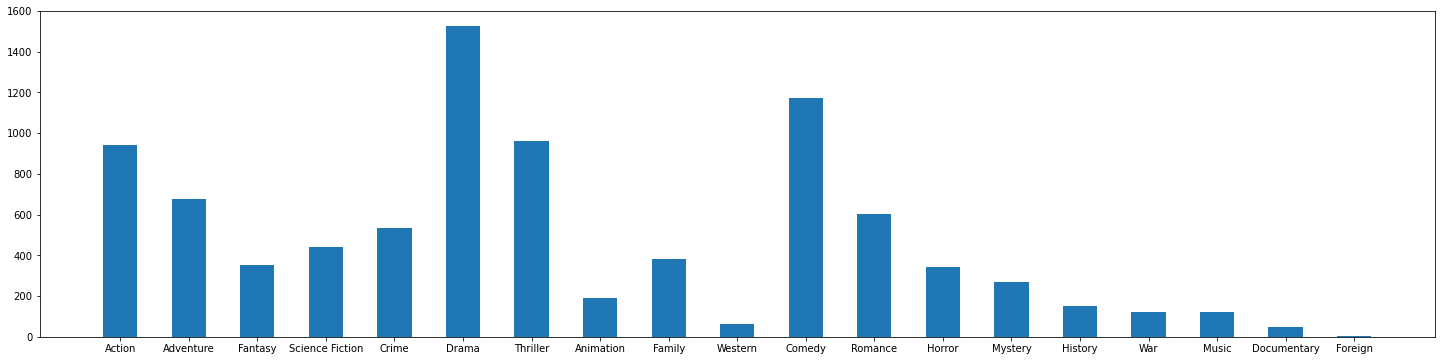

In [371]:
temp = []
for key in dict_revenue_by_genres.keys():
    temp.append(len(dict_revenue_by_genres.get(key)))
print(temp)
plt.figure(figsize=(25,6))
plt.bar(list(dict_revenue_by_genres),temp, 0.5)


In [372]:
#print(dict_revenue_by_genres)

In [373]:
for key in list(dict_revenue_by_genres):
    if len(dict_revenue_by_genres[key]) < np.mean(temp):
        dict_revenue_by_genres.pop(key)

[940, 675, 536, 1525, 959, 1174, 604]


<BarContainer object of 7 artists>

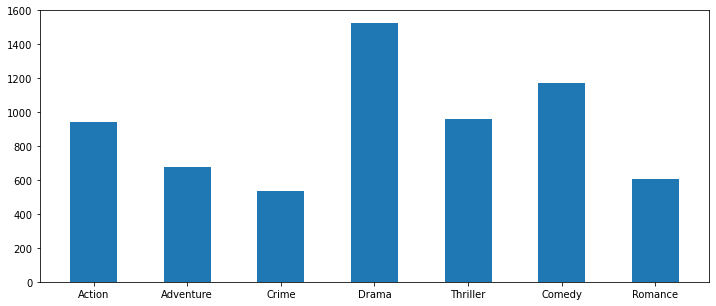

In [374]:
temp = []
for key in dict_revenue_by_genres.keys():
    temp.append(len(dict_revenue_by_genres.get(key)))
print(temp)
plt.figure(figsize=(12,5))
plt.bar(list(dict_revenue_by_genres),temp, 0.5)


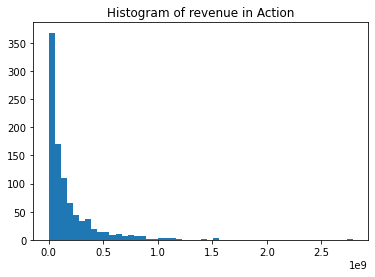

In [375]:
plt.hist(dict_revenue_by_genres.get('Action'), 50)
plt.title("Histogram of revenue in Action")
plt.show()

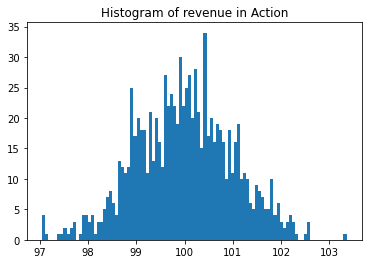

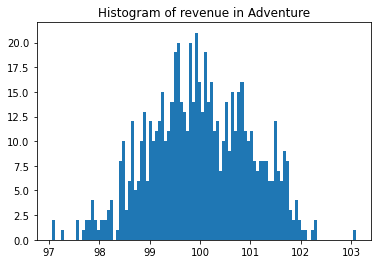

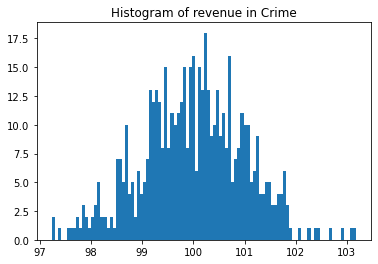

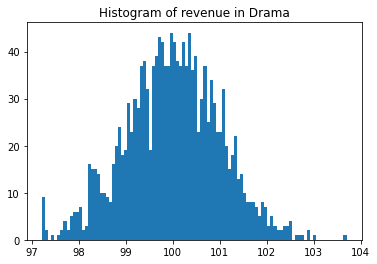

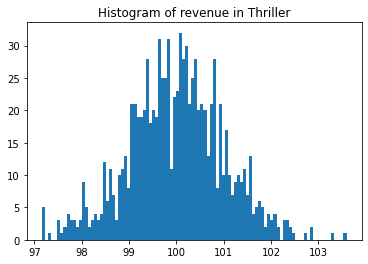

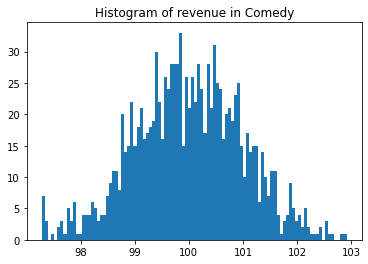

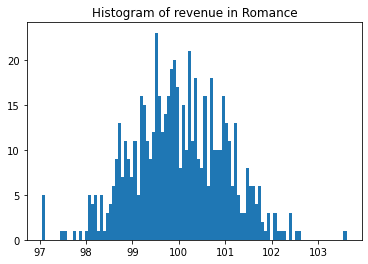

In [376]:
for key in dict_revenue_by_genres.keys():
    temp = np.array(dict_revenue_by_genres.get(key)).reshape(-1,1)
    transform_model = PowerTransformer().fit(temp)
    
    plt.hist(transform_distribution(temp), 100)
    plt.title("Histogram of revenue in " + key)
    plt.show()

In [377]:
temp = [(dict_revenue_by_genres.get(key)) for key in dict_revenue_by_genres.keys()]
anova_test = f_oneway(*temp)
print(anova_test)

F_onewayResult(statistic=90.56890071208527, pvalue=1.7301532490868618e-109)


### Kiểm định xem thể loại phim có ảnh hưởng đến điểm trung bình hay không?

In [378]:
dict_score_by_genres = {}
for index, row in df_revenue_score_genre.iterrows():
    for genres in row["genres"]:
        if genres in dict_score_by_genres:
            dict_score_by_genres[genres].append(row["vote_average"])
        else:
            dict_score_by_genres[genres] = [row["vote_average"]]

In [379]:
temp = []
for key in dict_score_by_genres.keys():
    temp.append(len(dict_score_by_genres.get(key)))

for key in list(dict_score_by_genres):
    if len(dict_score_by_genres[key]) < np.mean(temp):
        dict_score_by_genres.pop(key)
print(temp)

[940, 675, 351, 439, 536, 1525, 959, 191, 382, 61, 1174, 604, 344, 268, 150, 122, 121, 47, 6]


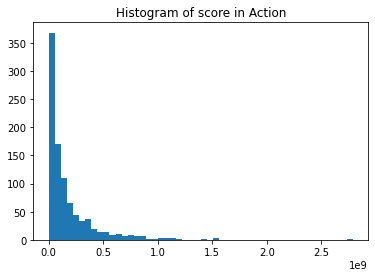

In [380]:
plt.hist(dict_revenue_by_genres.get('Action'), 50)
plt.title("Histogram of score in Action")
plt.show()

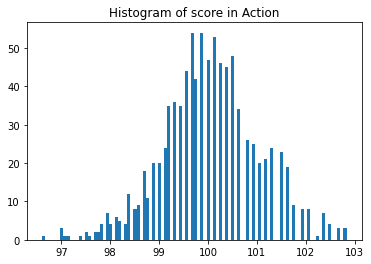

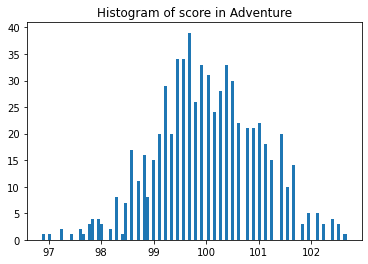

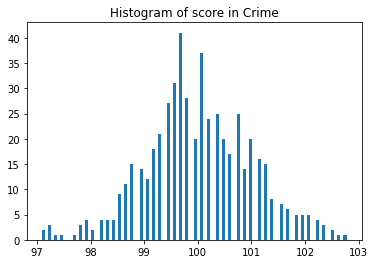

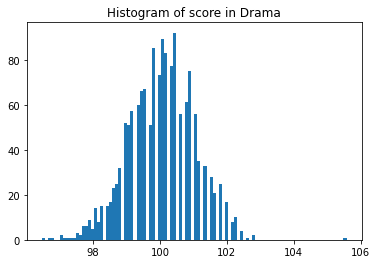

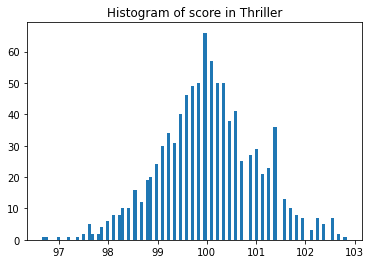

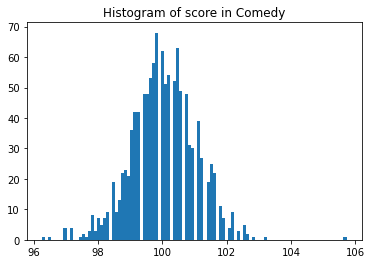

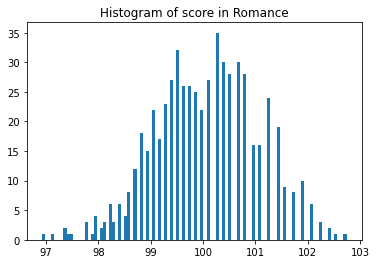

In [381]:
for key in dict_score_by_genres.keys():
    temp = np.array(dict_score_by_genres.get(key)).reshape(-1,1)
    transform_model = PowerTransformer().fit(temp)
    
    plt.hist(transform_distribution(temp), 100)
    plt.title("Histogram of score in " + key)
    plt.show()

In [382]:
temp = [(dict_score_by_genres.get(key)) for key in dict_score_by_genres.keys()]
anova_test = f_oneway(*temp)
print(anova_test)

F_onewayResult(statistic=61.25098678846717, pvalue=3.8581618340041e-74)


### => Cả pvalue của genres_and_avenue và pvalue của genres_and_score đều < 0.05
### => ta có thể phủ định H0 và chấp nhận giả thuyết H1: thể loại phim có ảnh hưởng đến doanh thu và điểm trung bình

[173361611.18617022, 244209720.8162963, 85897121.93283582, 78498996.81704918, 107664678.06986444, 104566028.62691653, 88811486.00165562]


<BarContainer object of 7 artists>

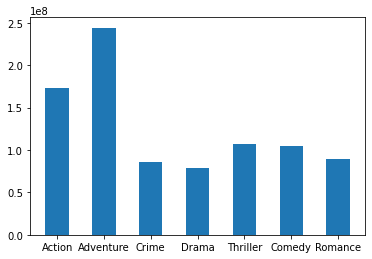

In [383]:
mean_revenue_by_genres =[]
for key in dict_revenue_by_genres.keys():
    mean_revenue_by_genres.append(np.mean(dict_revenue_by_genres.get(key)))
print(mean_revenue_by_genres)
plt.bar(list(dict_revenue_by_genres), mean_revenue_by_genres,0.5)

### ta thấy adventure là thể loại có doanh thu trung bình cao nhất theo sau là thể loại Action, và trong cùng 1 bộ phim thì cũng thường bao gồm cả 2 thể loại này.

[6.13, 6.237037037037037, 6.43115671641791, 6.60183606557377, 6.205005213764339, 6.0793867120954, 6.3500000000000005]


<BarContainer object of 7 artists>

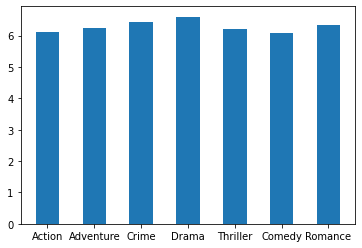

In [384]:
mean_score_by_genres =[]
for key in dict_score_by_genres.keys():
    mean_score_by_genres.append(np.mean(dict_score_by_genres.get(key)))
print(mean_score_by_genres)
plt.bar(list(dict_score_by_genres), mean_score_by_genres,0.5)

### ta thấy Drama là thể loại có điểm số trung bình cao nhất, theo sau là thể loại Crime, những bộ phim chú trọng vào xây dựng cốt truyện và diễn biến tâm lí nhân vật.

## 3. Ngày phát hành ảnh hưởng như thế nào đến doanh thu?
### Kiểm định xem tháng phát hành có ảnh hưởng đến doanh thu hay không

In [385]:
df_revenue_date = df_movies[["revenue","release_date"]]
df_revenue_date.replace(['[]','',0], np.nan, inplace=True)
df_revenue_date.dropna(inplace=True)

temp_months = []
temp_years = []

for date in df_revenue_date['release_date']:
    temp_months.append(int(date.month))
    temp_years.append(int(date.year))
    
df_revenue_date['months'] = temp_months
df_revenue_date['years'] = temp_years
print(df_revenue_date)

           revenue release_date  months  years
0     2.787965e+09   2009-12-10      12   2009
1     9.610000e+08   2007-05-19       5   2007
2     8.806746e+08   2015-10-26      10   2015
3     1.084939e+09   2012-07-16       7   2012
4     2.841391e+08   2012-03-07       3   2012
...            ...          ...     ...    ...
4775  7.690100e+04   2002-09-20       9   2002
4788  6.000000e+06   1972-03-12       3   1972
4792  9.900000e+04   1997-11-06      11   1997
4796  4.247600e+05   2004-10-08      10   2004
4798  2.040920e+06   1992-09-04       9   1992

[3376 rows x 4 columns]


### Kiểm tra với Months

In [386]:
dict_revenue_by_months = {}

dict_revenue_by_genres = {}
for index, row in df_revenue_date.iterrows():
        if row['months'] in dict_revenue_by_months:
            dict_revenue_by_months[row['months']].append(row["revenue"])
        else:
            dict_revenue_by_months[row['months']] = [row["revenue"]]


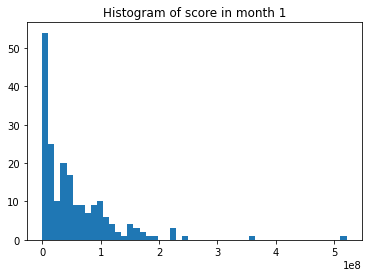

In [387]:
plt.hist(dict_revenue_by_months.get(1), 50)
plt.title("Histogram of score in month 1")
plt.show()

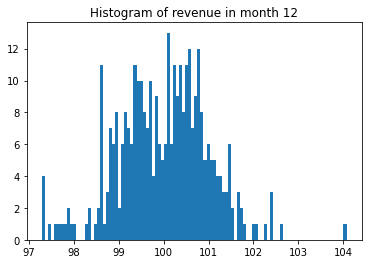

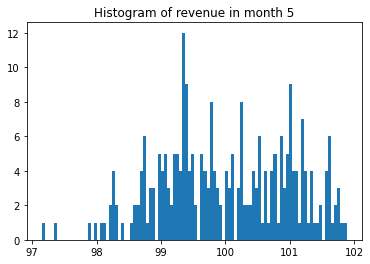

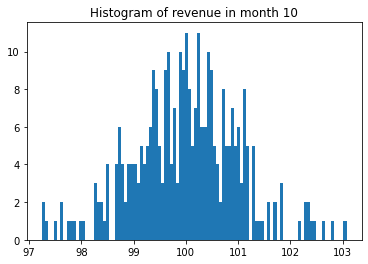

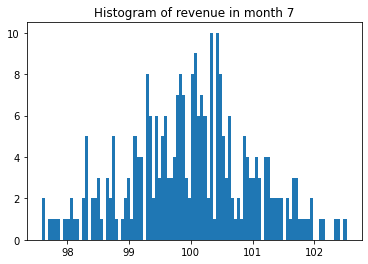

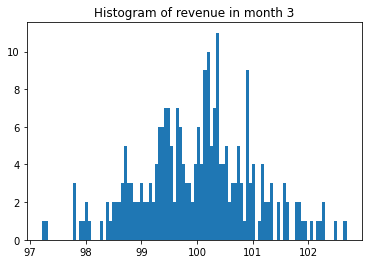

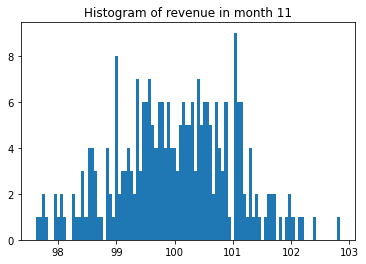

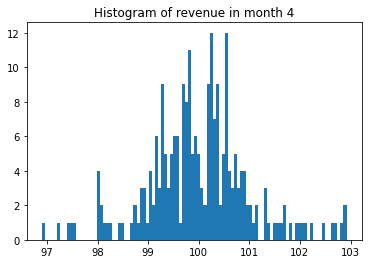

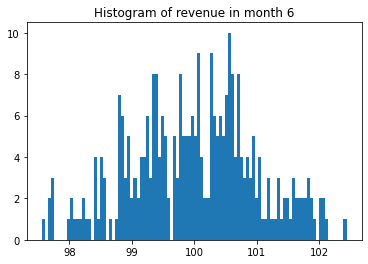

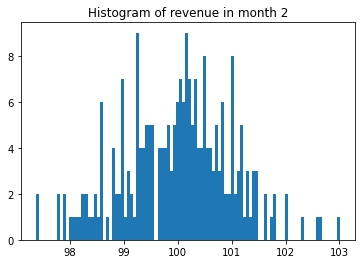

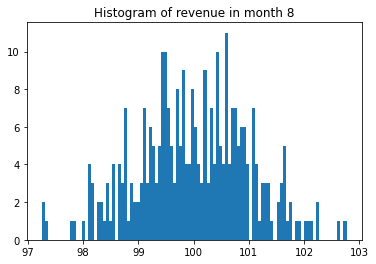

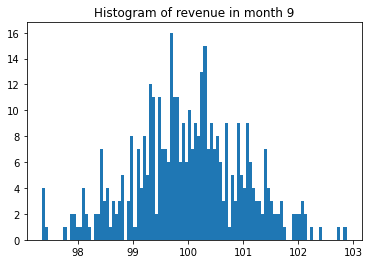

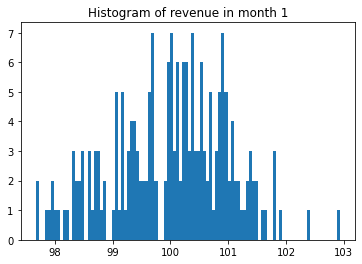

In [388]:
for key in dict_revenue_by_months.keys():
    temp = np.array(dict_revenue_by_months.get(key)).reshape(-1,1)
    transform_model = PowerTransformer().fit(temp)
    
    plt.hist(transform_distribution(temp), 100)
    plt.title("Histogram of revenue in month " + str(key))
    plt.show()

In [389]:
temp = [(dict_revenue_by_months.get(key)) for key in dict_revenue_by_months.keys()]
anova_test = f_oneway(*temp)
print(anova_test)

F_onewayResult(statistic=22.490496075000337, pvalue=5.489928466329646e-45)


### chấp nhận H1: các tháng có ảnh hưởng đến revenue

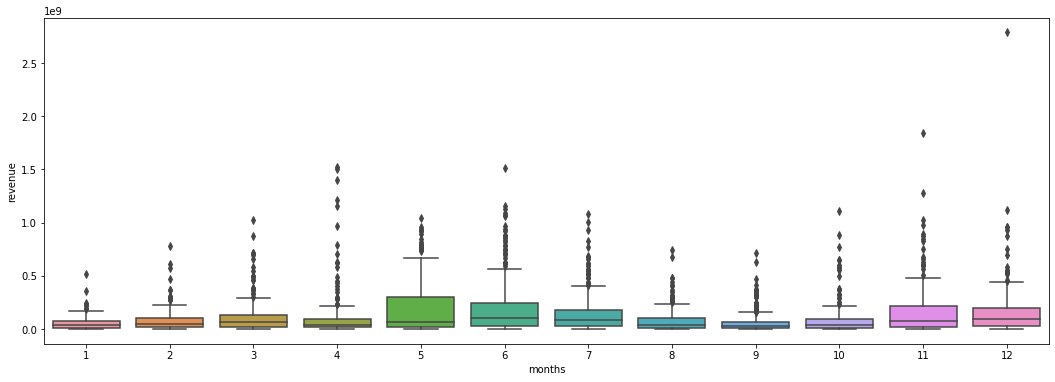

In [390]:
plt.figure(figsize=(18,6))
test = sns.boxplot(x='months',y='revenue',data=df_revenue_date)
plt.show()

### Ta thấy tháng 5, 6 và tháng 11, 12 là những cặp tháng có doanh thu cao hơn so với các tháng lân cận, phim phát hành vào thời điểm này thường có doanh thu cao, có thể là vì tháng 5, 6 là giai đoạn bước vào kì nghỉ hè, còn dịp cuối năm là dịp có nhiều ngày nghỉ lễ ở Châu Âu.

### Kiếm tra với years

In [391]:
dict_revenue_by_years = {}

for index, row in df_revenue_date.iterrows():
        if row['years'] in dict_revenue_by_years:
            dict_revenue_by_years[row['years']].append(row["revenue"])
        else:
            dict_revenue_by_years[row['years']] = [row["revenue"]]

print(len(list(dict_revenue_by_years)))


89


In [392]:
for key in list(dict_revenue_by_years):
    if len(dict_revenue_by_years[key]) < 100:
        dict_revenue_by_years.pop(key)

print(len(list(dict_revenue_by_years)))

17


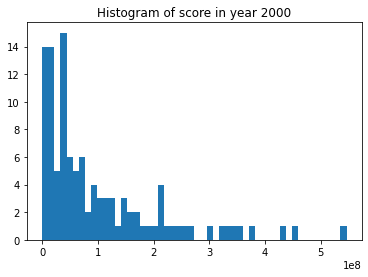

In [393]:
plt.hist(dict_revenue_by_years.get(2000), 50)
plt.title("Histogram of score in year 2000")
plt.show()

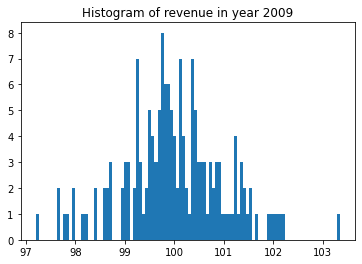

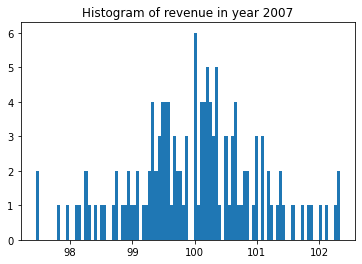

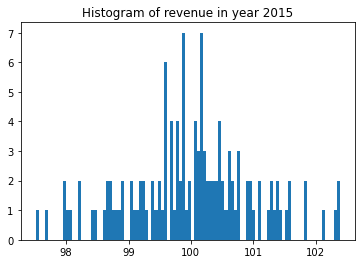

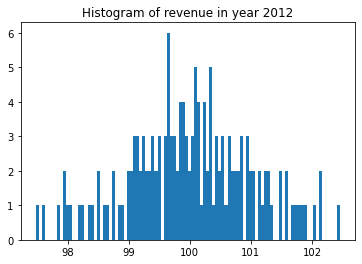

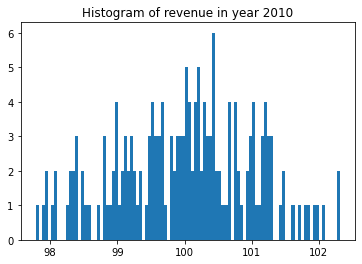

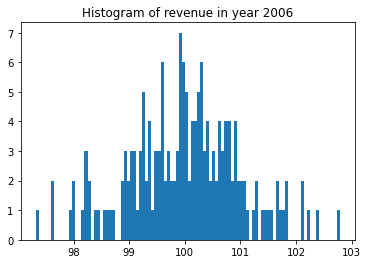

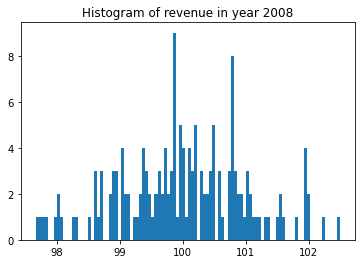

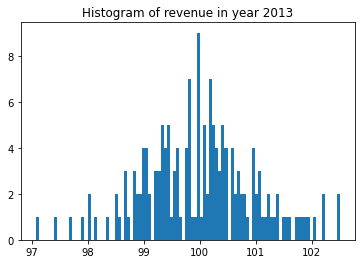

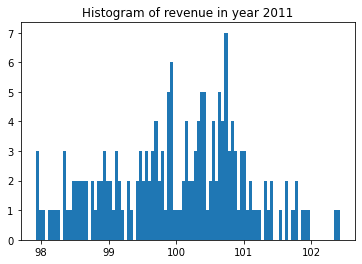

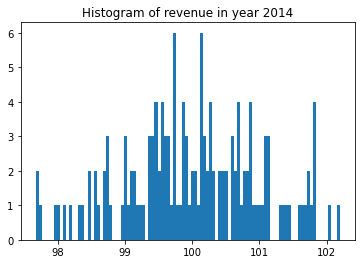

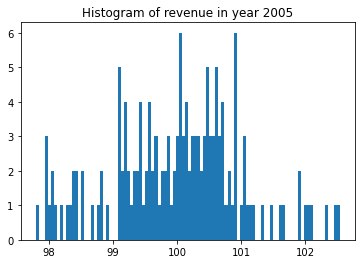

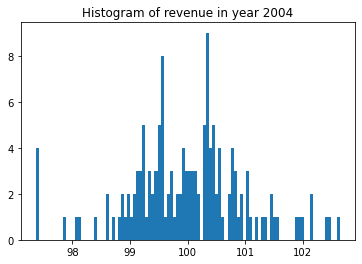

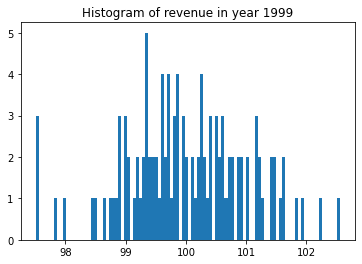

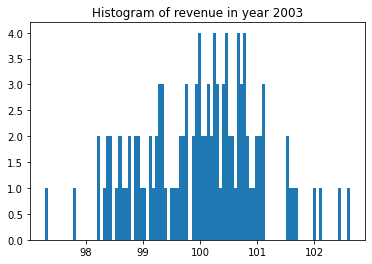

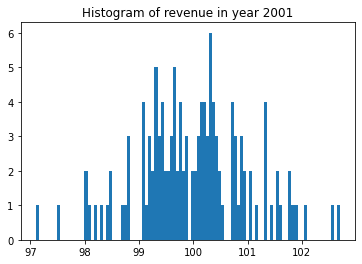

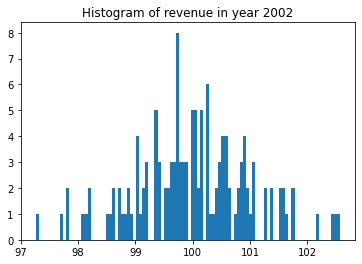

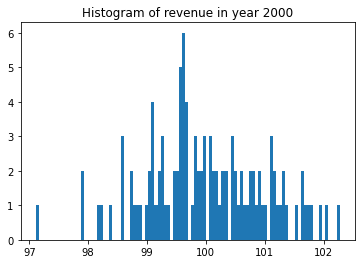

In [394]:
for key in dict_revenue_by_years.keys():
    temp = np.array(dict_revenue_by_years.get(key)).reshape(-1,1)
    transform_model = PowerTransformer().fit(temp)
    
    plt.hist(transform_distribution(temp), 100)
    plt.title("Histogram of revenue in year " + str(key))
    plt.show()

In [395]:
temp = [(dict_revenue_by_years.get(key)) for key in dict_revenue_by_years.keys()]
anova_test = f_oneway(*temp)
print(anova_test)

F_onewayResult(statistic=2.45029100198031, pvalue=0.001086561613909856)


### chấp nhận H1: năm sản xuất có ảnh hưởng đến revenue

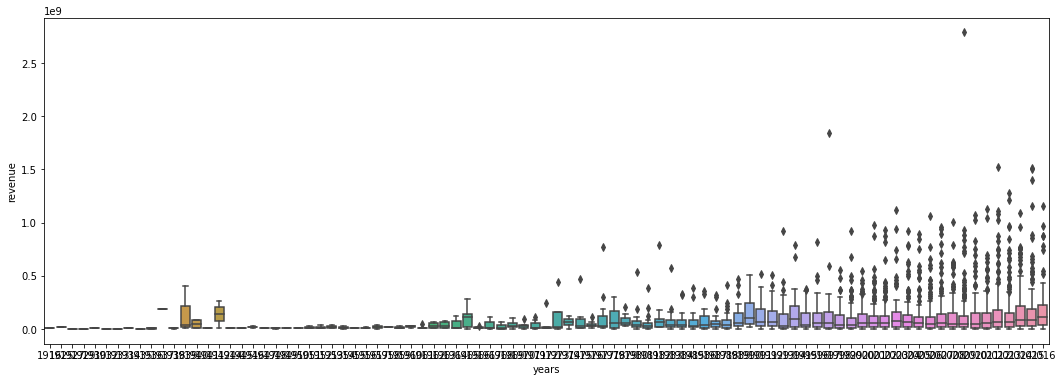

In [396]:
plt.figure(figsize=(18,6))
test = sns.boxplot(x='years',y='revenue',data=df_revenue_date)
plt.show()

#### Kiểm tra correlation

In [403]:
a = np.corrcoef(df_revenue_date['years'], df_revenue_date['revenue'])
print(a)

[[1.         0.13769686]
 [0.13769686 1.        ]]
